In [105]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Importing data

In [106]:
# import

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
pd.options.display.max_columns = None

In [107]:
# view train sample

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
# view test sample

test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [109]:
#Save the 'Id' column and drop it from main DFs

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [110]:
# get numbers of samples and features

print("Train data size: {} ".format(train.shape))
print("Test data size: {} ".format(test.shape))

Train data size: (1460, 80) 
Test data size: (1459, 79) 


# Looking at the target variable: house prices


 mu = 180921.20 and sigma = 79415.29



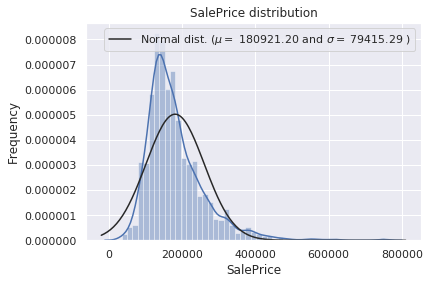

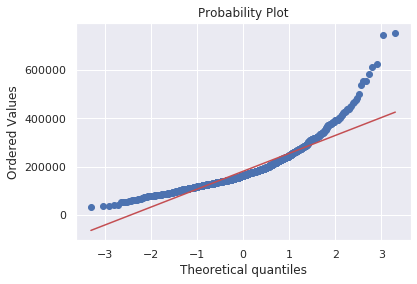

In [111]:
sns.distplot(train['SalePrice'] , fit=norm, color = 'b');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Plots show:
    - Not normally distributed
    - Positive skewness

In [112]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Missing data

In [113]:


train_data_na = (train.isnull().sum() / len(train)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data.head(20)

test_data_na = (test.isnull().sum() / len(test)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data_test = pd.DataFrame({'Missing Ratio' :test_data_na})
missing_data_test.head(20)


,Missing Ratio
PoolQC,99.794
MiscFeature,96.504
Alley,92.666
Fence,80.123
FireplaceQu,50.034
LotFrontage,15.559
GarageYrBlt,5.346
GarageCond,5.346
GarageQual,5.346
GarageFinish,5.346


In [114]:
# Imputing missing values

The large missing ratio can be explained in the documentation of the data. None and 0 have been registered as Nans. We impute these missing values now.

In [115]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType', 'MSSubClass'):
    train[col] = train[col].fillna('None')
    
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType', 'MSSubClass'):
    test[col] = test[col].fillna('None')

In [116]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [117]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    train[col] = train[col].fillna(0)
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    test[col] = test[col].fillna(0)

In [118]:
for col in ('Electrical', 'KitchenQual','Exterior1st', 'Exterior2nd', 'SaleType' ):
    train[col] = train[col].fillna(train[col].mode()[0])
    
for col in ('Electrical', 'KitchenQual','Exterior1st', 'Exterior2nd', 'SaleType' ):
    test[col] = test[col].fillna(test[col].mode()[0])


In [119]:
#Check remaining missing values if any 
train_data_na = (train.isnull().sum() / len(train)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data.head(20)

test_data_na = (test.isnull().sum() / len(test)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data_test = pd.DataFrame({'Missing Ratio' :test_data_na})
missing_data_test.head(20)


,Missing Ratio
MSZoning,0.274
Functional,0.137
Utilities,0.137


# Bivariate analysis

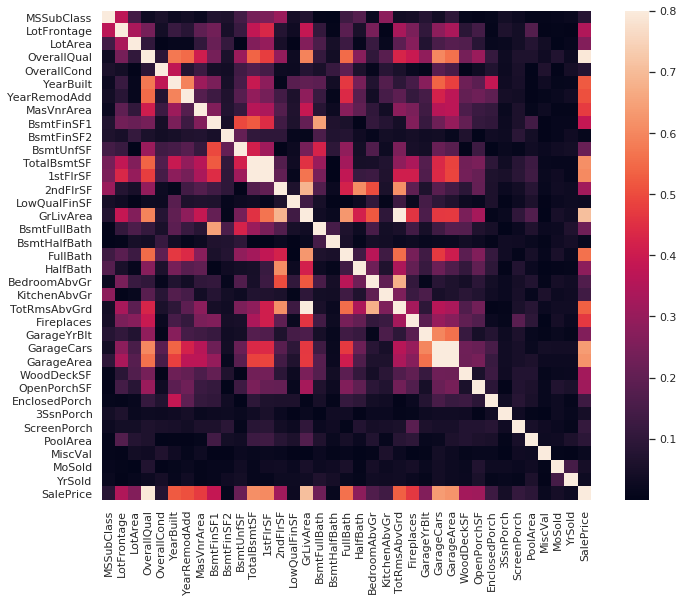

In [120]:
#correlation matrix
corr_mat = train.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);

In [121]:
high_corr_var=np.where(corr_mat>0.7)
high_corr_var=[(corr_mat.columns[x],corr_mat.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'SalePrice'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GarageCars', 'GarageArea')]

These correlations of the independent variables make sense, these are something we have to handle to avoid multicolinearity issues when modeling.

Next, we look at what features our target variable correlates with.

In [122]:
high_corr_var=np.where(corr_mat>0.5)
high_corr_var=[(corr_mat.columns[x],corr_mat.columns[y],
                train[corr_mat.columns[x]].corr(train[corr_mat.columns[y]]) )
               for x,y in zip(*high_corr_var) if x!=y and x==36]
high_corr_var

[('SalePrice', 'OverallQual', 0.7909816005838044),
 ('SalePrice', 'YearBuilt', 0.5228973328794969),
 ('SalePrice', 'YearRemodAdd', 0.5071009671113864),
 ('SalePrice', 'TotalBsmtSF', 0.6135805515591956),
 ('SalePrice', '1stFlrSF', 0.6058521846919147),
 ('SalePrice', 'GrLivArea', 0.7086244776126523),
 ('SalePrice', 'FullBath', 0.5606637627484449),
 ('SalePrice', 'TotRmsAbvGrd', 0.5337231555820282),
 ('SalePrice', 'GarageCars', 0.6404091972583529),
 ('SalePrice', 'GarageArea', 0.6234314389183618)]

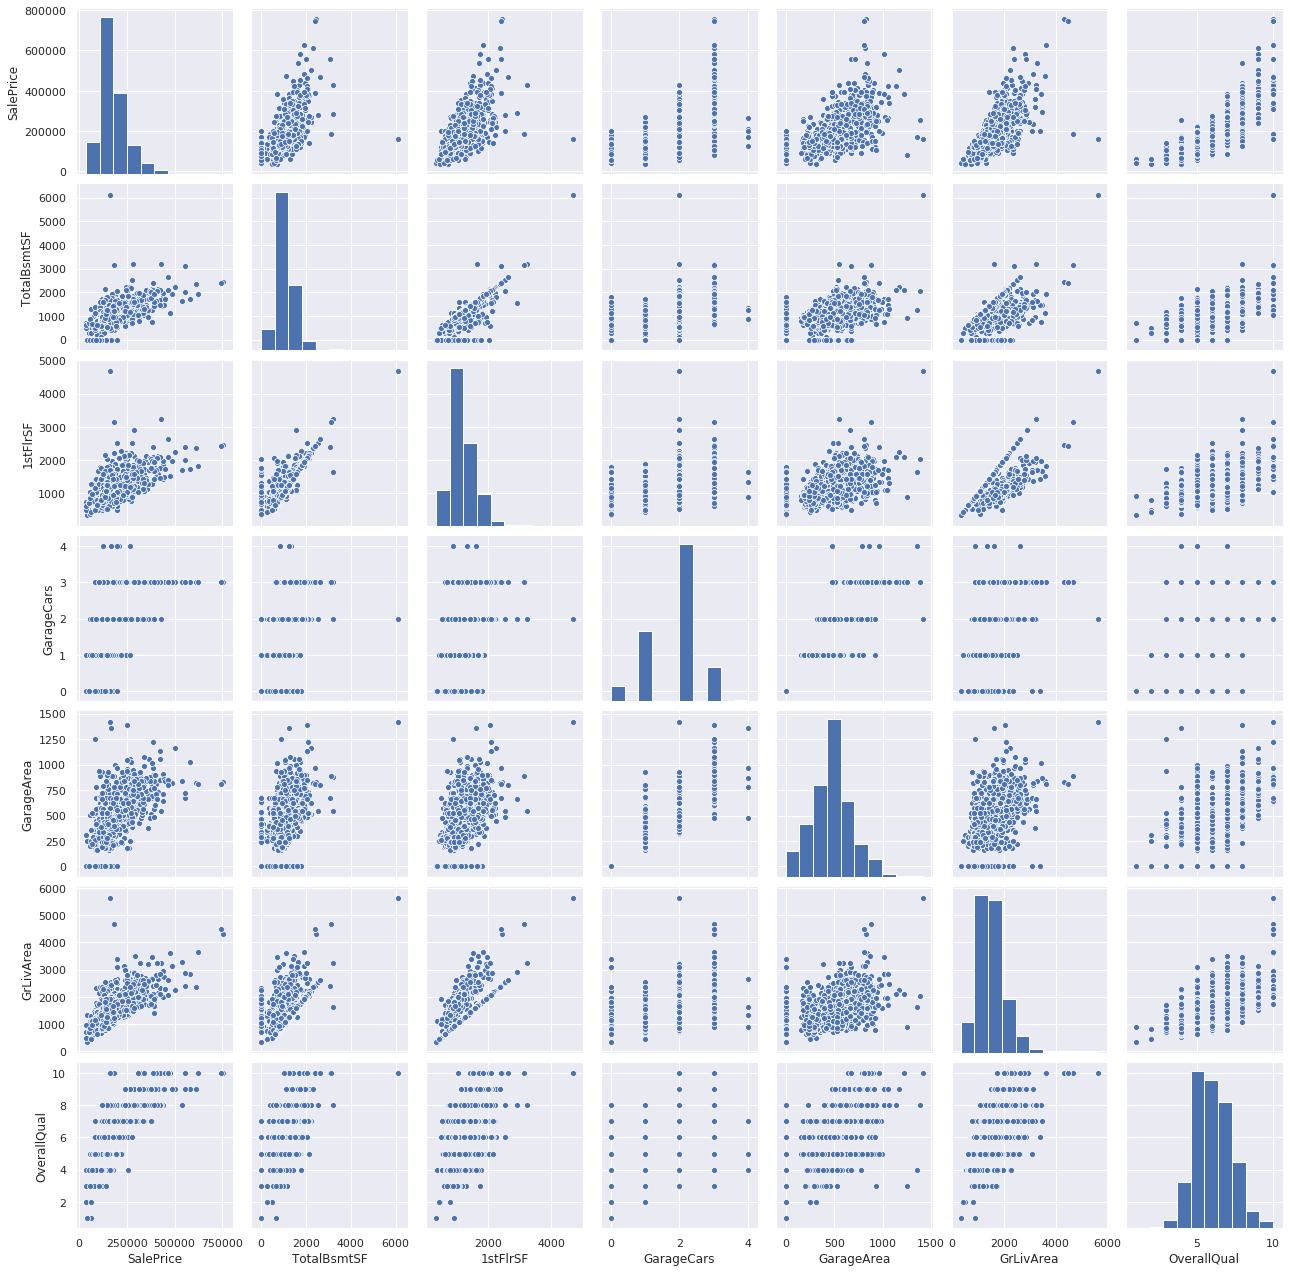

In [123]:
#Scatterplot
sns.set()
cols = ['SalePrice', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 
        'GarageArea', 'GrLivArea', 'OverallQual']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Handling mulitcolinearity

Of the independent variables that correlate with eachother, we delete the one with least correlation to SalePrice.

 ('YearBuilt', 'GarageYrBlt'), delete GarageYrBlt
 ('TotalBsmtSF', '1stFlrSF'), delete 1stFlrSF
 ('GrLivArea', 'TotRmsAbvGrd'), delete TotRmsAbvGrd
 ('GarageCars', 'GarageArea'), delete GarageArea

In [124]:
train.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'])

test.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,0,0,896,0.000,0.000,1,0,2,1,TA,Typ,0,None,Attchd,Unf,1.000,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,0,0,1329,0.000,0.000,1,1,3,1,Gd,Typ,0,None,Attchd,Unf,1.000,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,701,0,1629,0.000,0.000,2,1,3,1,TA,Typ,1,TA,Attchd,Fin,2.000,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,678,0,1604,0.000,0.000,2,1,3,1,Gd,Typ,1,Gd,Attchd,Fin,2.000,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,0,0,1280,0.000,0.000,2,0,2,1,Gd,Typ,0,None,Attchd,RFn,2.000,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.000,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546,0,1092,0.000,0.000,1,1,3,1,TA,Typ,0,None,None,None,0.000,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
1455,160,RM,21.000,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,TA,Y,SBrkr,546,0,1092,0.000,0.000,1,1,3,1,TA,Typ,0,None,CarPort,Unf,1.000,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,20,RL,160.000,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,Ex,Y,SBrkr,0,0,1224,1.000,0.000,1,0,4,1,TA,Typ,1,TA,Detchd,Unf,2.000,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,85,RL,62.000,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.000,TA,TA,PConc,Gd,TA,Av,GLQ,337.000,Unf,0.000,575.

# Outliers

In [125]:
train_num = train.select_dtypes(include=np.number)
train_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

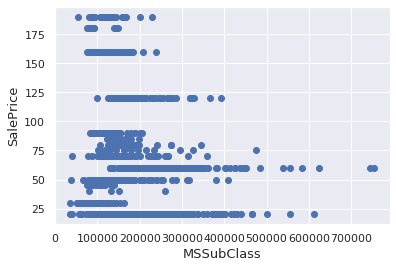

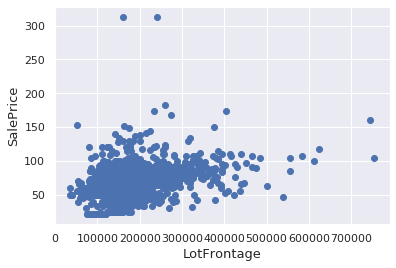

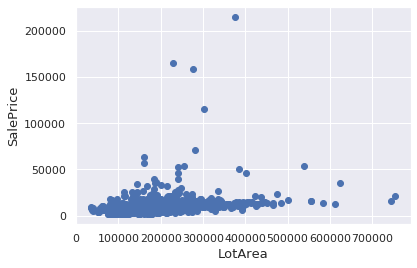

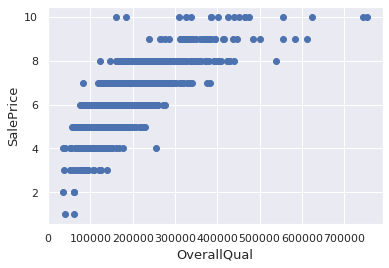

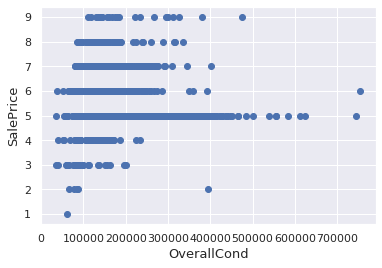

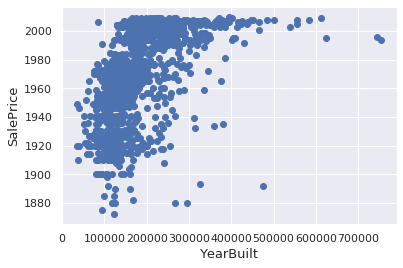

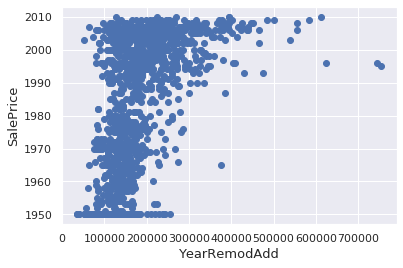

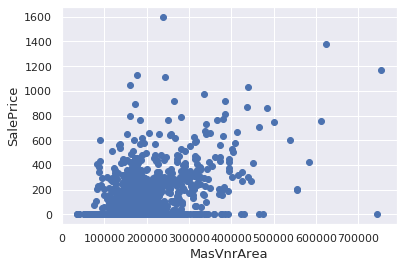

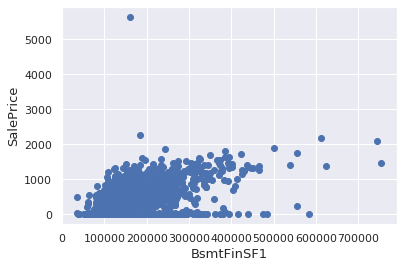

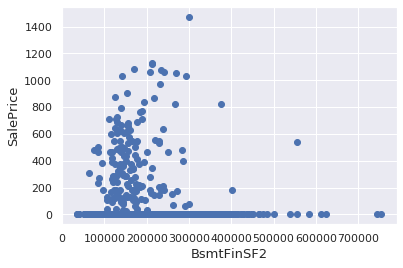

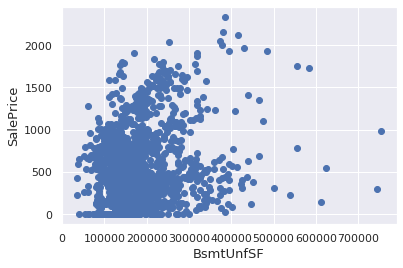

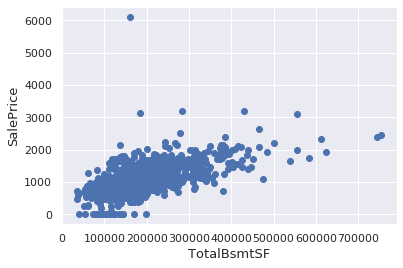

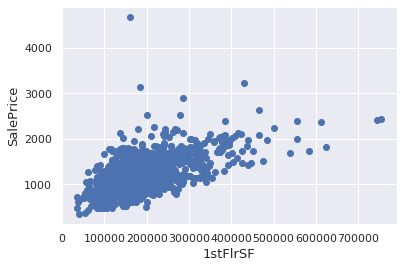

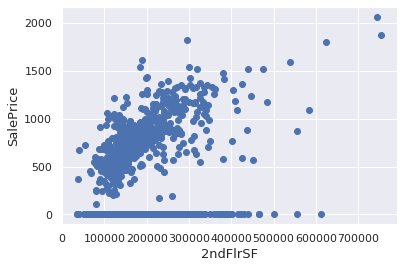

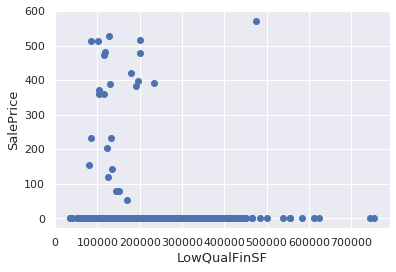

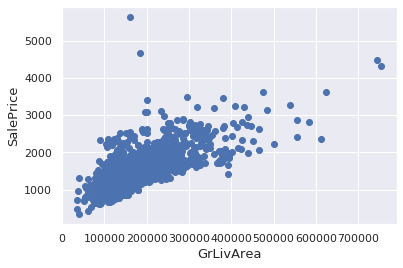

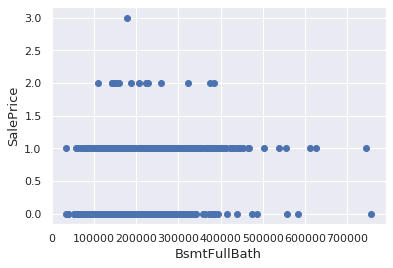

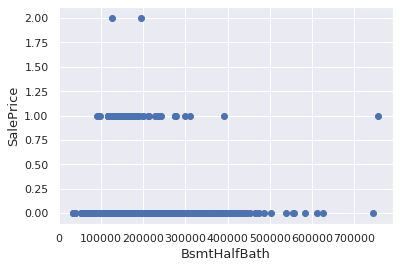

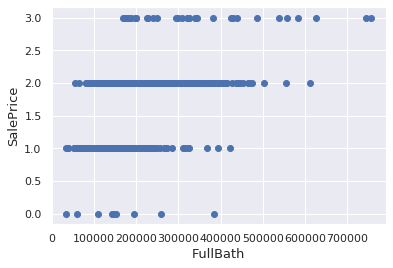

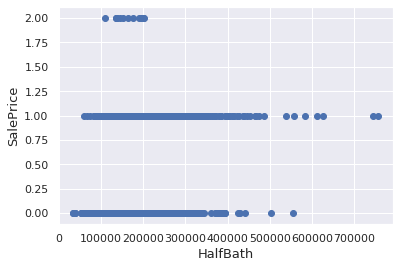

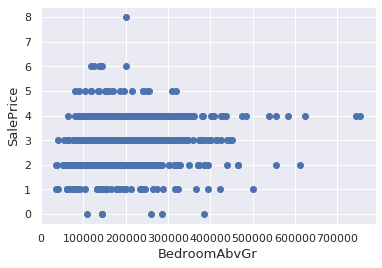

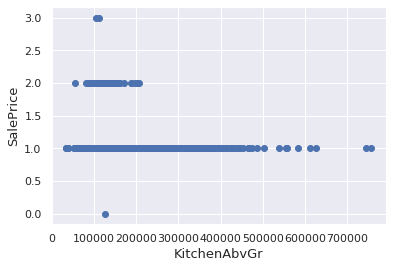

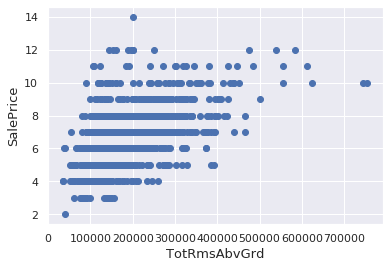

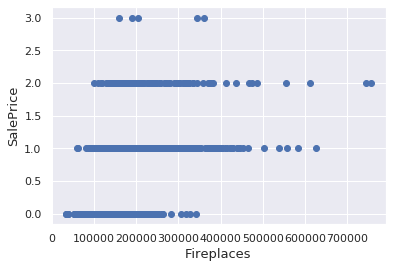

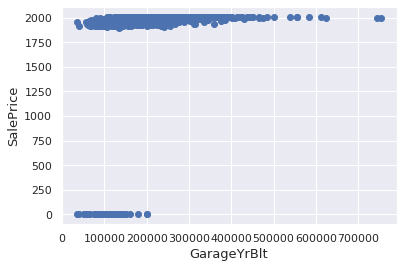

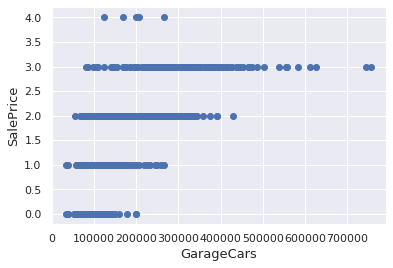

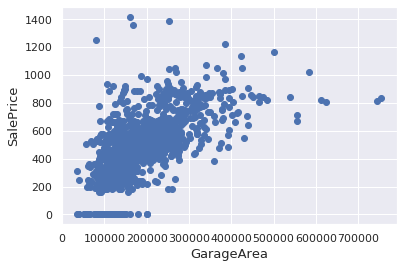

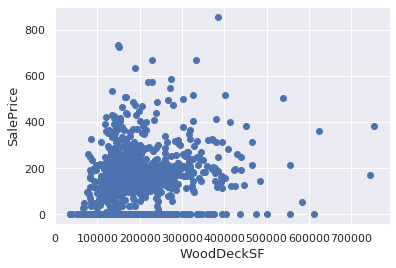

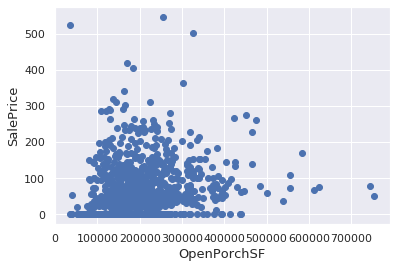

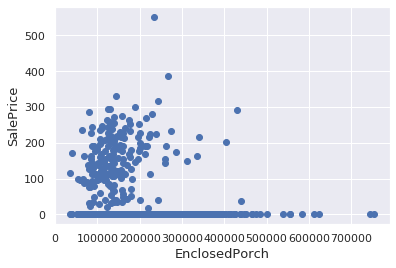

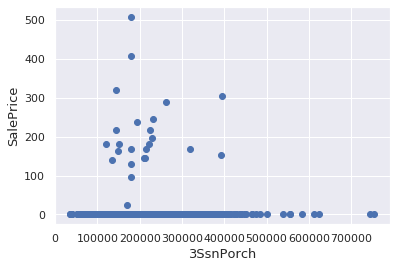

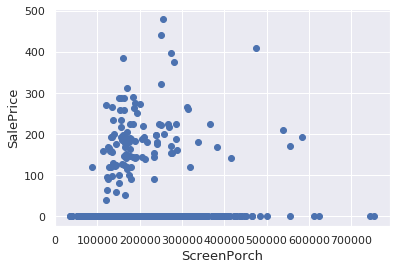

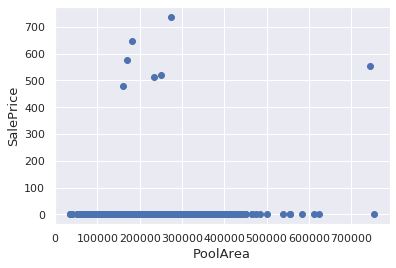

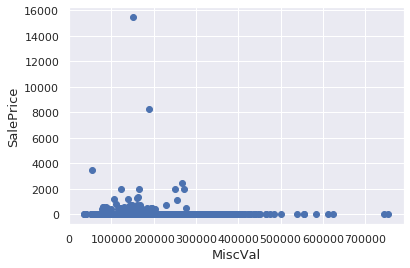

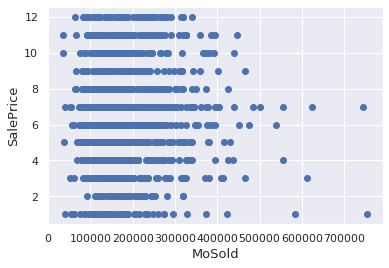

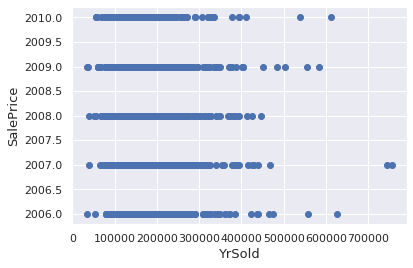

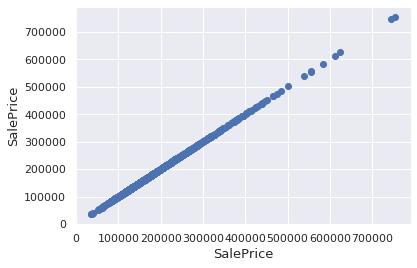

In [126]:
for col in train_num.columns:
    fig, ax = plt.subplots()
    ax.scatter(x = train['SalePrice'], y = train[col])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

We find only one case of serious outliers and thats the SalePrice-GrLivArea plot where two properties have 4000+ area while the price is below 200 000. We remove these outliers now.

In [127]:
#Deleting outliers

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)

# Looking at the data distributions

In section Looking at the target variable: house prices, we established that the target variable was not normally distributed and skewed. We fix this now through a log transformation.

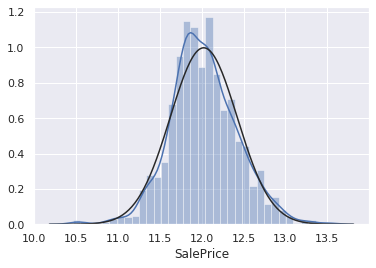

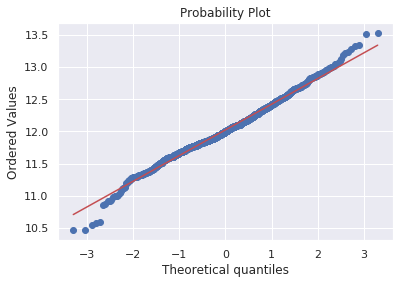

In [128]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

The data is now ready to for predictive modeling 